# Study area map

Fig. 1 from Moore-Maley and Allen, 2021, Ocean Sci.:

Map of the Salish Sea study region, SalishSeaCast model domain, meteorological observing platforms and the subdomain used for principal component analysis

***

In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt, patches
from cartopy import crs, feature

%matplotlib inline

In [2]:
plt.rcParams['font.size'] = 12

***

Load datasets and define key locations

In [3]:
# NEMO grid reference data
url = 'https://salishsea.eos.ubc.ca/erddap/griddap/'
grid = xr.open_dataset(url + 'ubcSSnBathymetryV17-02')
mask = xr.open_dataset(url + 'ubcSSn3DMeshMaskV17-02')
lon, lat, bathy = [grid[var].values for var in ('longitude', 'latitude', 'bathymetry')]
tmask = mask.tmask[0, 0, ...].values

# Wind/runoff data stations
stations = [
    {'name': 'Sentry Shoal' , 'xy': (-125.00, 49.92), 'm': 'o', 's': 10},
    {'name': 'Sisters Islet', 'xy': (-124.43, 49.49), 'm': 's', 's': 9},
    {'name': 'Halibut Bank' , 'xy': (-123.72, 49.34), 'm': '^', 's': 11},
    {'name': 'Sand Heads'   , 'xy': (-123.30, 49.10), 'm': 'D', 's': 8},
]

# Annotations
annotations = [
    {'name': 'Pacific\nOcean'     , 'xy': (0.100, 0.350), 'r':   0, 'wt': None  , 'arrow': None},
    {'name': 'Puget\nSound'       , 'xy': (0.790, 0.180), 'r':   0, 'wt': 'bold', 'arrow': None},
    {'name': 'Juan de Fuca'       , 'xy': (0.345, 0.310), 'r': -17, 'wt': 'bold', 'arrow': None},
    {'name': 'Strait'             , 'xy': (0.550, 0.310), 'r':   0, 'wt': 'bold', 'arrow': None},
    {'name': 'Johnstone'          , 'xy': (0.045, 0.770), 'r': -20, 'wt': None  , 'arrow': None},
    {'name': 'Strait'             , 'xy': (0.165, 0.715), 'r': -70, 'wt': None  , 'arrow': None},
    {'name': 'Fraser\nRiver'      , 'xy': (0.720, 0.550), 'r':   0, 'wt': None  , 'arrow': None},
    {'name': 'Howe\nSound'        , 'xy': (0.520, 0.630), 'r':   0, 'wt': None  , 'arrow': None},
    {'name': 'Baynes\nSound'      , 'xy': (0.190, 0.590), 'r':   0, 'wt': None  , 'arrow': None},
    {'name': 'Strait of\nGeorgia' , 'xy': (0.300, 0.495), 'r':   0, 'wt': 'bold', 'arrow': (0.44, 0.53,  0.02,  0.02)},
    {'name': 'Texada\nIsland'     , 'xy': (0.360, 0.710), 'r':   0, 'wt': None  , 'arrow': (0.40, 0.70,  0.00, -0.04)},
    {'name': 'Discovery\nIslands' , 'xy': (0.320, 0.850), 'r':   0, 'wt': None  , 'arrow': (0.33, 0.84, -0.03, -0.04)},
    {'name': 'Haro\nStrait'       , 'xy': (0.470, 0.380), 'r':   0, 'wt': None  , 'arrow': (0.55, 0.39,  0.04,  0.00)},
    {'name': 'Rosario\nStrait'    , 'xy': (0.760, 0.345), 'r':   0, 'wt': None  , 'arrow': (0.76, 0.37, -0.03,  0.01)},
]

***

Define plotting functions

In [4]:
def make_polygon(bbox):
    """Return lonlat polygon points for NEMO bbox (xmin, xmax, ymin, ymax)
    """
    
    corners = [(2, 0), (2, 1), (3, 1), (3, 0)]
    lonlat = [(lon[bbox[j], bbox[i]], lat[bbox[j], bbox[i]]) for j, i in corners]
    
    return np.array(lonlat)


def get_scalebar_pos(xy):
    """Return scalebar position in meters from xy in axis coordinates
    using the Universal Transverse Mercator (UTM) projection
    """
    
    x0, x1, y0, y1 = ax.get_extent(proj.as_geodetic())
    proj_utm = crs.UTM(np.floor(((x0 + x1) / 2 + 180) / 6) + 1)
    x0, x1, y0, y1 = ax.get_extent(proj_utm)
    return x0 + (x1 - x0) * xy[0], y0 + (y1 - y0) * xy[1], proj_utm

***

Build map

/home/bmoorema/miniconda3/envs/analysis-ben/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:761: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7f334b379130> with the PlateCarree projection.
  warnings.warn('Approximating coordinate system {!r} with the '


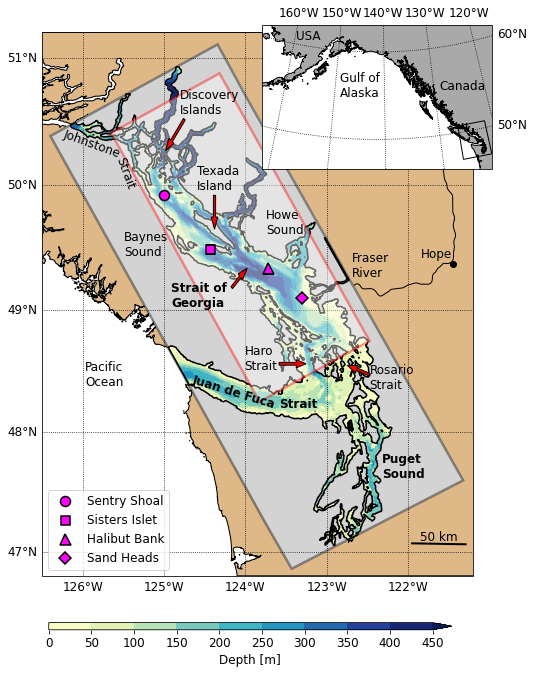

In [10]:
# ---------- Study Area Map -----------------
# Make figure
xlim, ylim = [-126.5, -121.2], [46.8, 51.2]
proj, proj_ref = crs.Mercator(np.mean(xlim), *ylim), crs.PlateCarree()
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': proj})

# ------------ Main Panel -------------------
# Map and projection
ax.set_extent(xlim + ylim)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood', zorder=0))
ax.add_feature(feature.NaturalEarthFeature(
    category='physical', name='rivers_lake_centerlines', scale='10m', fc='none', ec='k', zorder=0
))
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True)
gl.top_labels, gl.right_labels = False, False

# Model domain
c = ax.contourf(lon, lat, bathy, levels=np.arange(0, 451, 50), cmap='YlGnBu', extend='max', transform=proj_ref)
ax.contourf(lon, lat, tmask, levels=[-0.01, 0.01], colors='lightgray', transform=proj_ref)
ax.contour(lon, lat, tmask, levels=[-0.01, 0.01], colors='k', transform=proj_ref)
for bbox, ec, fc in zip([(0, -1, 0, -1), (110, 370, 300, 850)], ['k', 'r'], ['none', 'w']):
    ax.add_patch(patches.Polygon(make_polygon(bbox), fc=fc, ec=ec, lw=2.5, alpha=0.4, transform=proj_ref, zorder=10))

# Annotations
for ann in annotations:
    ax.text(*ann['xy'], ann['name'], transform=ax.transAxes, rotation=ann['r'], zorder=10, fontdict={'weight': ann['wt'], 'color': 'k'})
    if ann['arrow'] is not None:
        ax.arrow(*ann['arrow'], width=0.005, head_width=0.015, ec='k', fc='r', transform=ax.transAxes, zorder=10)

# Wind stations
for stn in stations:
    ax.plot(
        *stn['xy'], 'k'+stn['m'], label=stn['name'], transform=proj_ref,
        ms=stn['s'], mfc='magenta', mew=1.5, zorder=10
    )

# Hope flow gauge
x, y = -121.44, 49.37
ax.text(x-0.4, y+0.05, 'Hope', transform=proj_ref)
ax.plot(x, y, 'ko', transform=proj_ref)

# Legend
ax.legend(loc=3)

# Scalebar
length = 50
x, y, proj_utm = get_scalebar_pos((0.92, 0.06))
dx = length * 1000 / 2
ax.plot([x - dx, x + dx], [y, y], transform=proj_utm, color='k', lw=2)
ax.text(x, y, f'{length} km', transform=proj_utm, ha='center', va='bottom', zorder=10)

# ------------- Map Inset -------------------
# Map and projection
xmap, ymap = [-161, -122], [45, 62]
ax = fig.add_axes([0.52, 0.59, 0.4, 0.4], projection=crs.LambertConformal(np.mean(xmap), np.mean(ymap)))
ax.set_extent(xmap + ymap)
ax.add_feature(feature.GSHHSFeature('low', edgecolor='k', facecolor='darkgray'))
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, x_inline=False, ylocs=range(50, 61, 10))
gl.bottom_labels, gl.left_labels = False, False
gl.xlabel_style, gl.ylabel_style = {'rotation': 0}, {'rotation': 0}

# Overlay labels and region box
ax.text(0.34, 0.50, 'Gulf of\nAlaska', transform=ax.transAxes)
ax.text(0.77, 0.55, 'Canada', transform=ax.transAxes)
ax.text(0.15, 0.90, 'USA', transform=ax.transAxes)
ax.add_patch(patches.Rectangle(
    (xlim[0], ylim[0]), int(np.diff(xlim)), int(np.diff(ylim)),
    transform=proj_ref, fill=False, ec='k', zorder=10,
))

# Add colorbar for model bathymetry
cax = fig.add_axes([0.15, 0.05, 0.7, 0.01])
fig.colorbar(c, cax=cax, orientation='horizontal', label='Depth [m]')